# 演習4 - トランズモン型量子ビット

## 歴史的背景

量子コンピューターでは、量子情報の基本単位として「量子ビット」が用いられます。量子ビットは、本質的には2準位系の量子力学的なシステムであり、電子のスピン（スピン量子ビット）、イオンの原子準位（イオントラップ量子ビット）などの自然界の系や、超伝導回路による人工的な量子系（超伝導量子ビット）など、多くの物理システムに実装することができます。

最初につくられた超伝導量子ビットは、ジョセフソン接合によって鉛に弱く結合された超伝導体に、厳密に定義されたクーパー対（超伝導体内の束縛電子）を配置したものでした。このクーパーペアボックス型量子ビットでは、$|0\rangle$の状態と$|1\rangle$の状態の間のエネルギー差は、システム内または周辺の自由電子や静電気の影響を敏感に受けます。そして、この電荷ノイズに敏感に反応して、量子ビットの位相緩和が起こります。クーパーペアボックス型量子ビットの位相緩和時間（$T_2$）は、通常、～1$\mu s$程度です。

2007年初めて提案されたトランズモン型量子ビットにおける重要な発見は、このエネルギーの電圧依存性（分散と呼ばれる）が周期的であることでした。分路コンデンサーを導入すると、ジョセフソン・エネルギーと充電エネルギーの比$E_J/E_c$が50程度と非常に大きくなり、平坦な電荷分散が得られるようになります。クーパー対は電荷ノイズ（図1aのx軸上の不確かさ）に非常に敏感ですが、トランズモン型量子ビットではほとんどが抑制されています（図1d）。また、トランズモン量子ビットの位相緩和時間（$T_2$）は大幅に改善されているのがわかります。IBMの量子システムにおいては、$T_2$は通常～100 $\mu s$です。[`ibmq_santiago`](https://quantum-computing.ibm.com/services?skip=0&systems=all&system=ibmq_santiago)の例を参照してください。

<img src="resources/transmon-charge-dispersion.png" alt="Transmon charge dispersion" style="width:50%">

この演習では、実際のIBM量子システムを用いて分光を行い、トランズモン型量子ビットのエネルギー特性を調べます。ジョセフソン・エネルギーと充電エネルギーの比$E_J/E_c$は、その前身であるクーパー対型量子ビットの充電ノイズ問題を解決する鍵となります。

### 参考文献

1. Nakamura, Yasunobu, Yu A. Pashkin, and Jaw Shen Tsai. "Coherent control of macroscopic quantum states in a single-Cooper-pair box." Nature 398.6730 (1999): 786-788.
2. Koch, Jens, et al. "Charge-insensitive qubit design derived from the Cooper pair box." Physical Review A 76.4 (2007): 042319.

## トランズモン型量子ビットのエネルギーレベルとエネルギー特性

量子調和振動子（QHO）のハミルトニアンは、線形LC回路のハミルトニアンを量子化することで得られます。そのエネルギー準位は等間隔です（図2c）。しかし、ジョセフソン接合という非線形回路素子を導入すると、トランズモン型量子ビットのエネルギー準位が変化して（図2d）、そのエネルギー準位はもはや等間隔でなくなります。高エネルギーのエネルギー準位の間隔は、低エネルギーのものよりも小さくなっています。非調和性$\delta$は、$|1\rangle \rightarrow |2\rangle$ と$|0\rangle \rightarrow |1\rangle$の間のエネルギー差 $\delta = \hbar \omega_{12} - \hbar \omega_{01}$または$\omega_{12} - \omega_{01}$として定義されます。（ここでは、 $\hbar \equiv 1$とします）。マイクロ波の周波数を$\omega_{01}$に調整することで、多準位のトランズモンを2準位系、つまり量子ビットとして効果的に扱うことができるのです。

<figure>
    <img src="resources/transmon-energy-levels.png" alt="Transmon energy levels" style="width:50%">
    <center><figcaption><b>Fig. 2</b> Energy potential for a quantum harmonic oscillator and a trasmon qubit. (from Ref [3])</figcaption></center>
</figure>

超電導体では、電子は$2e$の有効電荷を持つクーパー対を形成します。充電エネルギー$E_c$は、量子ビットに1つのクーパー対を加えるためのエネルギーコストであり、超電導回路の静電容量と関係があります。ジョセフソン・エネルギー$E_J$は、ジョセフソン接合をトンネルするクーパー対のエネルギーであり、トランズモン型量子ビットでは、誘導エネルギーはすべてジョセフソン接合によって提供されますが、これは他の種類の超伝導量子ビットには当てはまりません。（超伝導量子ビットの設計と解析に関する詳細はは、最近リリースされました[Qiskit Metal](https://qiskit.org/metal/)を参照ください）

Duffing(ダフィング)振動子のハミルトニアンをクーパーペアボックスのハミルトニアンから導き出すことで、これらのエネルギーは関連するトランズモンの周波数に次のように関連づけることができます。

$$
f_{01} = \sqrt{8 E_c E_J} - E_c \qquad E_c = -\delta = f_{01} - f_{12},
$$

このノートでは、周波数を表す記号として、マイクロ波に使われることが多い$f$を$\omega$に置き代えて使用します。非調和性は、すべて充電エネルギー$E_c$によってもたらされます。物理的には、結合部分に大きな*分路*（並列）コンデンサーとして組み込まれています。これにより、電荷ノイズの影響を抑えつつ、トランズモンのエネルギー準位を十分に分離することができます。

## Qiskit Pulse の概要

これまでは、抽象的な量子回路レベルで量子ビットを扱ってきました。回路内の量子ゲートは、物理的にはマイクロ波パルスとして実装されています。Qiskit Pulseは、IBM量子システムに送信されるマイクロ波パルスを操作するパルスレベルのアクセスを提供します。

簡単な概要説明として、Qiskit Pulseのスケジュール（実験）は、Channel（例：ドライブチャネル）に作用するInstruction（例：Play）で構成されています。ここでは、利用可能な命令とチャンネルの概要を示します。

![image](resources/pulse-instr.png)

詳しくは、実際の量子ハードウェアとチャネルの相互作用をまとめた表をご覧ください。

![image](resources/pulse-user-device-layers.png)

Qiskit Pulseについては、[Qiskit documentation](https://qiskit.org/documentation/apidoc/pulse.html)で詳しく説明されていますが、私たちは解説を交えたPulseプログラミングから始める方がより理解の習得が進むと考えています。そこで、以下では、パルス、スケジュールを作成し、実際の量子システムで実験を行う方法を学びます。

## さあ始めよう!

<div class="alert alert-block alert-success">

**目標**
    
$|1\rangle \rightarrow |2\rangle$ 遷移周波数$f_{12}$を見つける
    
**計画**
    
1. **(チュートリアル)** 分光法（周波数スイープ）による$|0\rangle \rightarrow |1\rangle$ 遷移周波数$f_{01}$を見つけましょう。
1. **(チュートリアル)** ラビ振動（振幅スイープ）による X-180 パルスの振幅キャリブレーション
1. **(問題)** キャリブレートした X-180 パルスと分光法（周波数スイープ）による$|1\rangle \rightarrow |2\rangle$ 遷移周波数$f_{12}$を見つけましょう。
    
</div>

<div class="alert alert-block alert-danger">

**このノートブックで編集が必要なのは <a href="#problem">問題の１つのセルだけ</a> です。** あるいは、より良いフィッティングを得るために <a href="#fit-f12">フィッティングパラメータを変更</a> する必要があるかもしれませんが、それ以外のためにセルを編集する必要はありません。しかしながら、`shift+Enter` を押してセルを実行する必要はあります。 

</div>

Qiskit Pulse の重要な点に集中するために、後続のセルは `helper` モジュールを使います。詳細はQiskit Textbook [Investigating Quantum Hardware Using Microwave Pulses
](https://qiskit.org/textbook/ch-quantum-hardware/index-pulses.html) 及び [Qiskit Global Summer School](https://qiskit.org/learn/intro-qc-qh/) の Lectures 16-21, Labs 6-7を参照してください。

In [5]:
# Import helper module from local folder
import sys
import os
sys.path.append(os.getcwd()) 
from resources import helper

# Numerical and plotting tools
import numpy as np
import matplotlib.pyplot as plt

# Import SI unit conversion factors
from resources.helper import GHz, MHz, kHz, us, ns

<div class="alert alert-block alert-danger">
 
**スペシャルプロバイダー**
    
今回のチャレンジのために新しい量子システム `ibmq_jakarta` をリザーブしました。参加者はチャレンジ期間中（2021/05/20-26）スペシャル[プロバイダー](https://quantum-computing.ibm.com/composer/docs/iqx/manage/provider/#providers)への独占的なアクセスを手に入れます。スペシャルプロバイダーにアサインされるには**５つのチャレンジのうち最低１つを完了**する必要があります。そうすればあなたの IBM Quantumアカウントに`You have been added to a new project in IBM Quantum` というメールが送られます。
    
すべてが正常に動作していれば、[アカウントの詳細ページ](https://quantum-computing.ibm.com/account)に特別なプロバイダーの情報が表示されるはずです。
    
IBM Quantum アカウントは、IBMid と関連付けられている必要があります。そうでない場合は、`Login with some authorized required.`というエラーが発生します。IBM Quantumアカウントに関連付けられている同じ電子メールアドレスを使用して[新しいIBMidを登録](https://auth.quantum-computing.ibm.com/auth/idaas)し、[IBM Quantum](https://quantum-computing.ibm.com)に再度ログインしてください。
    
**注意: エクササイズの完了からアサインされるまで１２時間かかることがあります。** なにか問題があれば、Qiskit Slack ワークスペースの [#iqc2021](https://qiskit.slack.com/archives/C021UTFN9GE) にお問い合わせください。まだ参加していない方は、Qiskit Slackのワークスペース[こちら](https://ibm.co/joinqiskitslack)に参加してください。
    
</div>

スペシャルプロバイダーにアサインされていることをチェックするために、次のセルを実行してください。スペシャルプロバイダーに追加されていれば、以下のようなメッセージが出力されます。`<AccountProvider for IBMQ(hub='iqc2021-n', group='challenge-m', project='ex4')>`。 `n`は`1`から`10` までの数、`m`は`1`から`1000`までの数です。この番号は `ibmq_jarkarta` への接続に必要になります。

In [6]:
# Importing standard Qiskit libraries
from qiskit import IBMQ
from qiskit.tools.jupyter import *

# Loading your IBM Quantum account
IBMQ.load_account()
IBMQ.providers() # see a list of providers you have access to

ibmqfactory.load_account:WARNING:2021-05-22 10:08:36,132: Credentials are already in use. The existing account in the session will be replaced.


[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>,
 <AccountProvider for IBMQ(hub='iqc2021-5', group='challenge-60', project='ex4')>]

In [7]:
# get the special provider assigned to you using information from the output above
hub_name = 'iqc2021-5' # e.g. 'iqc2021-1'
group_name = 'challenge-60' # e.g. 'challenge-1'
project_name = 'ex4' # your project name should be 'ex4'
provider = IBMQ.get_provider(hub=hub_name, group=group_name, project=project_name)

# get `ibmq_jakarta` backend from the provider
backend_name = 'ibmq_jakarta'
backend = provider.get_backend(backend_name)
backend # see details of the `ibmq_jakarta` quantum system

<IBMQBackend('ibmq_jakarta') from IBMQ(hub='iqc2021-5', group='challenge-60', project='ex4')>

### チャネルをインスタンス化し、測定スケジュールを得る

我々は以後、異なるドライブスケジュールに対して同じ測定スケジュールを使います。どのバックエンドについても、個別に較正(calibrate)する代わりにデフォルトの測定パルスを使うことができます。

In [8]:
from qiskit import pulse
from qiskit.pulse import Play, Schedule, DriveChannel

# please use qubit 0 throughout the notebook
qubit = 0

次に、バックエンドコンフィグレーションとサンプリング時間 $dt$ をセーブします。プロットのために、`AcquireChannel` を除外します。

In [9]:
backend_config = backend.configuration()
exc_chans = helper.get_exc_chans(globals())
dt = backend_config.dt
print(f"Sampling time: {dt*1e9} ns") 

Sampling time: 0.2222222222222222 ns


`instruction_schedule_map` はバックエンドで使われるデフォルトのキャリブレート済みパルスのパラメータを与えます。この "ネイティブゲートセット" は、あなたが
[`QuantumCircuit`](https://qiskit.org/documentation/apidoc/circuit.html#gates-and-instructions) で使えるオペレーターのサブセットで構成されており、Qiskit が `QuantumCircuit` をトランスパイルする先のものであることがわかります。 

In [10]:
backend_defaults = backend.defaults()
center_frequency = backend_defaults.qubit_freq_est
inst_sched_map = backend_defaults.instruction_schedule_map 
inst_sched_map.instructions

['cx', 'id', 'measure', 'rz', 'sx', 'u1', 'u2', 'u3', 'x']

インストラクションはバックエンドのネイティブゲートセットで構成されます: 単一量子ビットゲート, $X$のルート`sx`, パラメータ化された $Z$-軸回転 `rz(θ)`,　そして二量子ビット 制御-NOT `cx`。その他にもいつくかゲートがリストされています。特にオイラー角に基づく ["U-gates"](https://qiskit.org/textbook/ch-states/single-qubit-gates.html#generalU3) は deprecated のため、もうすぐ使えなくなります。

Basis Gate | Operation
 --- | ---
 `u1(λ)` | `rz(λ)`
 `u2(φ,λ)` | `rz(φ+π/2) sx rz(λ-π/2)`
 `u3(θ,φ,λ)` | `rz(φ+π) sx rz(θ+π) sx rz(λ)`
 `id` | identity
 `x` | $X$ for echoes in dynamical decoupling
 `measure` | measurement

一つ注意が必要なのは、それぞれの `sx` は１つの物理パルスで構成されますが、`rz` は [frame changes](https://arxiv.org/abs/1612.00858) によるソフトウェアで実装されることです。
`instruction_schedule_map` からはスクラッチすることなく、デフォルトの計測パルスを得ることができます。これはキャリブレート済みのパルスから始めることにも使えます。

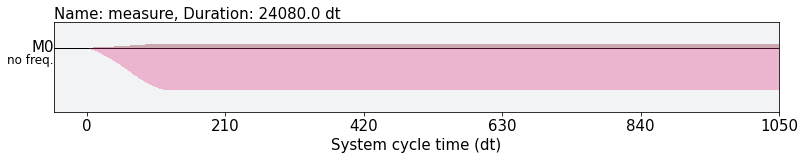

In [11]:
# retrieve calibrated measurement pulse from backend
meas = inst_sched_map.get('measure', qubits=[qubit])
meas.exclude(channels=exc_chans).draw(time_range=[0,1000])

<div class="alert alert-block alert-success">

### ステップ１(チュートリアル): $|0\rangle \rightarrow |1\rangle$ 遷移検索
    
このセクションのコードは変更する必要がありません。セルを実行してステップを理解してください。`spec01_scheds` の作り方には特に注意してください。同じようなパルススケジュールを<a href="#problem">最終問題</a>で作る必要があります。パルススケジュールの作り方についてより詳細は[ドキュメント](https://qiskit.org/documentation/tutorials/circuits_advanced/06_building_pulse_schedules.html)を参照してください。
    
</div>

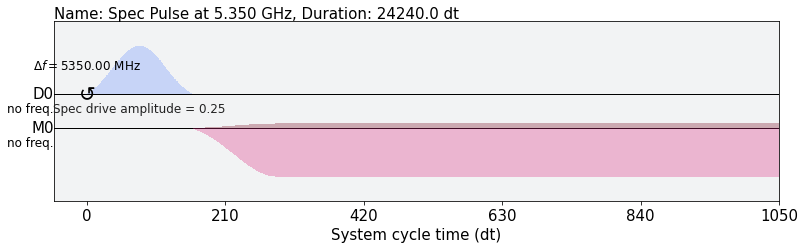

In [12]:
from qiskit.pulse import DriveChannel, Gaussian

# The same spec pulse for both 01 and 12 spec
drive_amp = 0.25
drive_duration = inst_sched_map.get('x', qubits=[qubit]).duration

# Calibrated backend pulse use advanced DRAG pulse to reduce leakage to the |2> state.
# Here we will use simple Gaussian pulse

drive_sigma = drive_duration // 4 # DRAG pulses typically 4*sigma long. 
spec_pulse = Gaussian(duration=drive_duration, amp=drive_amp, 
                        sigma=drive_sigma, name=f"Spec drive amplitude = {drive_amp}")

# Construct an np array of the frequencies for our experiment
spec_freqs_GHz = helper.get_spec01_freqs(center_frequency, qubit)

# Create the base schedule
# Start with drive pulse acting on the drive channel
spec01_scheds = []
for freq in spec_freqs_GHz:
    with pulse.build(name="Spec Pulse at %.3f GHz" % freq) as spec01_sched:
        with pulse.align_sequential():
            # Pay close attention to this part to solve the problem at the end
            pulse.set_frequency(freq*GHz, DriveChannel(qubit))
            pulse.play(spec_pulse, DriveChannel(qubit))
            pulse.call(meas)
            
    spec01_scheds.append(spec01_sched)

# Draw spec01 schedule
spec01_scheds[-1].exclude(channels=exc_chans).draw(time_range=[0,1000])

In [13]:
from qiskit.tools.monitor import job_monitor

# Run the job on a real backend
spec01_job = backend.run(spec01_scheds, job_name="Spec 01", **helper.job_params) 

print(spec01_job.job_id())
job_monitor(spec01_job)

# If the queuing time is too long, you can save the job id 
# And retrieve the job after it's done
# Replace 'JOB_ID' with the the your job id and uncomment to line below
#spec01_job = backend.retrieve_job('JOB_ID')

/opt/conda/lib/python3.8/site-packages/qiskit/compiler/assembler.py:309: RuntimeWarning: Dynamic rep rates are supported on this backend. 'rep_delay' will be used instead of 'rep_time'.
  warnings.warn("Dynamic rep rates are supported on this backend. 'rep_delay' will be "


60a8d9adb94539cf783ea239
Job Status: job has successfully run


### 分光データのフィッティング

 



量子ビット周波数 $f_{01}$ を見つけるため、分光信号を *ローレンツ* 関数にフィットします

$$ \frac{AB}{\pi[(f-f_{01})^2 + B^2]} + C $$

以下はフィッティングパラメーターです:


Parameter | Correponds to
 --- | ---
 $A$ | amplitude
 $f_{01}$ | 01 frequency guess (GHz)
 $B$ | scale
 $C$ | offset

`helper` モジュールから `SpecFitter` を使います。これは `qiskit.ignis.characterization.fitters` ライブラリのフィッターをベースにしています。
 
<div class="alert alert-block alert-danger">

**注意:** より良いフィッティングのためには、フィッティングパラメーターを調整する必要があります。

</div>

Spec01 frequency is 5.237542 GHz


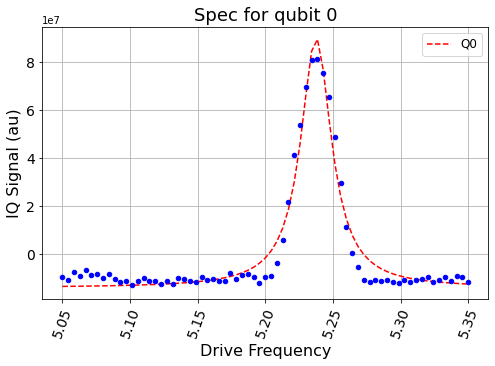

In [66]:
from resources.helper import SpecFitter

amp_guess = 5e6
f01_guess = 5
B = 1
C = 0
fit_guess = [amp_guess, f01_guess, B, C]

fit = SpecFitter(spec01_job.result(), spec_freqs_GHz, qubits=[qubit], fit_p0=fit_guess)
fit.plot(0, series='z')
f01 = fit.spec_freq(0, series='z')
print("Spec01 frequency is %.6f GHz" % f01)

バックエンドのキャリブレート済み量子ビット周波数とあなたの結果を比較してみましょう！うまくいけば、近い値 ($\pm$1 MHz) が得られます。

In [67]:
# Retrieve qubit frequency from backend properties
f01_calibrated = backend.properties().frequency(qubit) / GHz 
f01_error = abs(f01-f01_calibrated) * 1000 # error in MHz
print("Qubit frequency error is %.6f MHz" % f01_error) 

Qubit frequency error is 1.146667 MHz


🎉 おめでとうございます！あなたは実機上の最初のパルスの実験に成功しデータ解析をしました。これは Qiskit Pulse と `ibmq_armonk` 　を[２年弱前に発表](https://www.ibm.com/blogs/research/2019/12/qiskit-openpulse/) する前は不可能でした。今あなたは量子物理学の実験を家から実施しています。信じられないことです！

<div class="alert alert-block alert-success">

### ステップ２(チュートリアル): ラビ振動による X-180 パルス振幅のキャリブレーション

このセクションのコードは変更する必要がありません。セルを実行してステップを理解してください。 
</div>

### 測定した周波数からラビ・スケジュールを作る

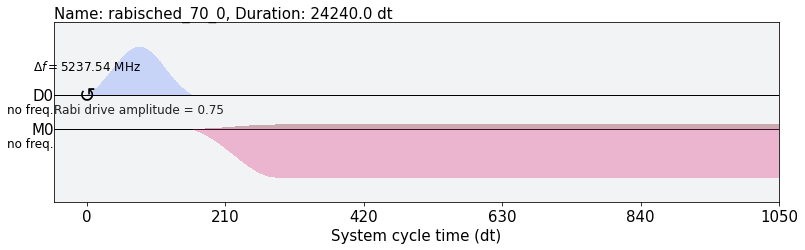

In [16]:
max_rabi_amp = 0.75
rabi_amps = helper.get_rabi_amps(max_rabi_amp)

rabi_scheds = []
for ridx, amp in enumerate(rabi_amps):
    with pulse.build(name="rabisched_%d_0" % ridx) as sched: # '0' corresponds to Rabi
        with pulse.align_sequential():
            pulse.set_frequency(f01*GHz, DriveChannel(qubit))
            rabi_pulse = Gaussian(duration=drive_duration, amp=amp, \
                              sigma=drive_sigma, name=f"Rabi drive amplitude = {amp}")
            pulse.play(rabi_pulse, DriveChannel(qubit))
            pulse.call(meas)
    rabi_scheds.append(sched)

# Draw rabi schedule
rabi_scheds[-1].exclude(channels=exc_chans).draw(time_range=[0,1000])

In [17]:
# Run the job on a real device
rabi_job = backend.run(rabi_scheds, job_name="Rabi", **helper.job_params)

print(rabi_job.job_id())
job_monitor(rabi_job)

# If the queuing time is too long, you can save the job id 
# And retrieve the job after it's done
# Replace 'JOB_ID' with the the your job id and uncomment to line below
#rabi_job = backend.retrieve_job('JOB_ID')

/opt/conda/lib/python3.8/site-packages/qiskit/compiler/assembler.py:309: RuntimeWarning: Dynamic rep rates are supported on this backend. 'rep_delay' will be used instead of 'rep_time'.
  warnings.warn("Dynamic rep rates are supported on this backend. 'rep_delay' will be "


60a8dacf07f093192734f046
Job Status: job has successfully run


### ラビ・データのフィッティング

ラビ周期 $T = 2\pi/f$ を見つけるため、ラビ信号を正弦関数にフィットします。

$$ a \cos(2\pi f x + \phi) + c $$

以下はフィッティングパラメーターです:

Parameter | Correponds to
 --- | ---
 $a$ | amplitude
 $f$ | Rabi drive frequency
 $\phi$ | phase offset
 $c$ | offset


`qiskit.ignis.characterization.calibration.fitters` ライブラリから `RabiFitter` を使います。

<div class="alert alert-block alert-danger">

**注意:** より良いフィッティングのためには、フィッティングパラメーターを調整する必要があります。

</div>

Pi amplitude is 0.205


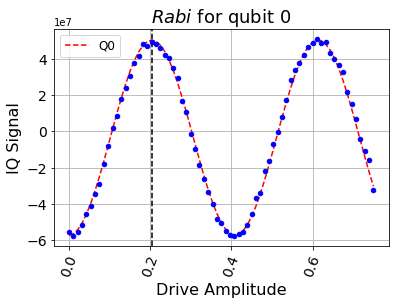

In [18]:
from qiskit.ignis.characterization.calibrations.fitters import RabiFitter

amp_guess = 5e7
fRabi_guess = 2
phi_guess = 0.5
c_guess = 0
fit_guess = [amp_guess, fRabi_guess, phi_guess, c_guess]

fit = RabiFitter(rabi_job.result(), rabi_amps, qubits=[qubit], fit_p0=fit_guess)
fit.plot(qind=0, series='0')
x180_amp = fit.pi_amplitude()
print("Pi amplitude is %.3f" % x180_amp)

<div id='problem'></div>
<div class="alert alert-block alert-success">

### ステップ３(問題): $|1\rangle \rightarrow |2\rangle$ 遷移周波数を見つける
    
トランズモン量子ビットの $|1\rangle$ と $|2\rangle$ の間の状態遷移を観測するため、以下が必要です: 

1. 量子ビットを $|0\rangle$ から $|1\rangle$ にするため $X_\pi$ パルスを適用する
1. $|1\rangle \rightarrow |2\rangle$ 遷移を見つけるため、周波数を変えながら第二のパルスを適用する

</div>
<div class="alert alert-block alert-danger">
下のセルがこのノートブックで唯一編集が必要なセルです。
</div>

In [70]:
# Define pi pulse
x_pulse = Gaussian(duration=drive_duration,
                     amp=x180_amp, 
                     sigma=drive_sigma,
                     name='x_pulse')

def build_spec12_pulse_schedule(freq, anharm_guess_GHz):    
    with pulse.build(name="Spec Pulse at %.3f GHz" % (freq+anharm_guess_GHz)) as spec12_schedule:
        with pulse.align_sequential():              
            # こちらのコメント間にコードを記入ください - 開始
            # Pay close attention to this part to solve the problem at the end
            # 第一励起状態へ励起するための周波数は既にわかっています。
            pulse.set_frequency((5.237)*GHz, DriveChannel(qubit))
            pulse.play(x_pulse, DriveChannel(qubit))

            # 第一励起状態へ励起する際と比較して0.3GHz低い周波数をスキャンします。
            pulse.set_frequency((freq+anharm_guess_GHz)*GHz, DriveChannel(qubit))
            pulse.play(spec_pulse, DriveChannel(qubit))
            pulse.call(meas)
            # こちらのコメント間にコードを記入ください  - 終了
    return spec12_schedule

我々のトランズモン量子ビットの非調和性は通常 $-300$ MHz 付近にあるため、その周りをスイープします。

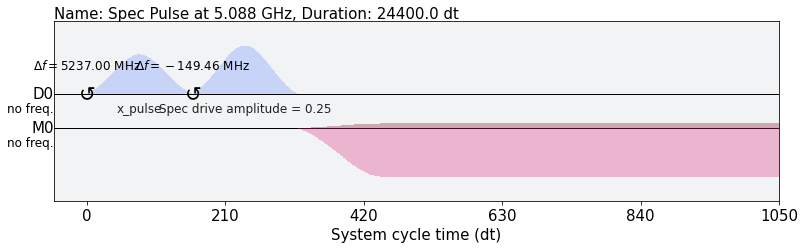

In [71]:
anharmonicity_guess_GHz = -0.3 # your anharmonicity guess
freqs_GHz = helper.get_spec12_freqs(f01, qubit)

# Now vary the sideband frequency for each spec pulse
spec12_scheds = []
for freq in freqs_GHz:
    spec12_scheds.append(build_spec12_pulse_schedule(freq, anharmonicity_guess_GHz))

# Draw spec12 schedule   
spec12_scheds[-1].exclude(channels=exc_chans).draw(time_range=[0,1000])

In [72]:
# Run the job on a real device
spec12_job = backend.run(spec12_scheds, job_name="Spec 12", **helper.job_params)

print(spec12_job.job_id())
job_monitor(spec12_job)

# If the queuing time is too long, you can save the job id 
# And retrieve the job after it's done
# Replace 'JOB_ID' with the the your job id and uncomment to line below
#spec12_job = backend.retrieve_job('JOB_ID')

/opt/conda/lib/python3.8/site-packages/qiskit/compiler/assembler.py:309: RuntimeWarning: Dynamic rep rates are supported on this backend. 'rep_delay' will be used instead of 'rep_time'.
  warnings.warn("Dynamic rep rates are supported on this backend. 'rep_delay' will be "


60a8f311e61180a67def2d34
Job Status: job has successfully run


### 分光データのフィッティング

<div id='fit-f12'></div>

$|1\rangle \to |2\rangle$ 遷移 $f_{12}$ を見つけるため、再び分光信号をローレンツ関数にフィットします。

$$ \frac{AB}{\pi[(f-f_{12})^2 + B^2]} + C $$

以下はフィッティングパラメータです:

Parameter | Correponds to
 --- | ---
 $A$ | amplitude
 $f_{12}$ | 12 frequency guess (GHz)
 $B$ | scale
 $C$ | offset
 
 
<div class="alert alert-block alert-danger">

**注意:** より良いフィッティングのためには、フィッティングパラメーターを調整する必要があります。

</div>

Spec12 frequency is 4.900903 GHz


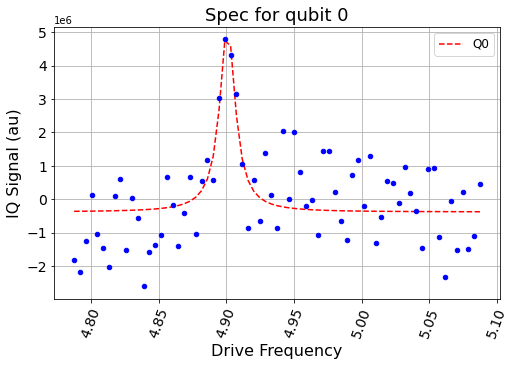

In [73]:
amp_guess = 8e7
#f12_guess = f01 - 0.3
f12_guess = 4.94
#B = .1
B = .01
C = 0
fit_guess = [amp_guess, f12_guess, B, C]

fit = SpecFitter(spec12_job.result(), freqs_GHz+anharmonicity_guess_GHz, qubits=[qubit], fit_p0=fit_guess)
fit.plot(0, series='z')
f12 = fit.spec_freq(0, series='z')
print("Spec12 frequency is %.6f GHz" % f12)

In [74]:
# Check your answer using following code
from qc_grader import grade_ex4
grade_ex4(f12,qubit,backend_name)

Grading your answer for ex4. Please wait...

Congratulations 🎉! Your answer is correct.
Feel free to submit your answer.



In [75]:
# Submit your answer. You can re-submit at any time.
from qc_grader import submit_ex4
submit_ex4(f12,qubit,backend_name)

Submitting your answer for ex4. Please wait...
Success 🎉! Your answer has been submitted.


## $E_J/E_c$を計算する

導入部の式を修正し、パルス実験で得られた$f_{01}$と$f_{12}$を用いて、$E_c$と$E_J$を計算することができます。

$$
E_c = -\delta = f_{01} - f_{12} \qquad E_J = \frac{(2f_{01}-f_{12})^2}{8(f_{01}-f_{12})}
$$

In [ ]:
Ec = f01 - f12
Ej = (2*f01-f12)**2/(8*(f01-f12))
print(f"Ej/Ec: {Ej/Ec:.2f}") # this value is typically ~ 30 

## Additional information

**Created by:** Nick Brønn, Junye Huang

**Version:** 1.0.0